In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

#  Protein Abundance

In [4]:
gene = 'PIK3CA'
protList = ['IRS1']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for IRS1: 
Ttest_indResult(statistic=-0.5083089884962738, pvalue=0.6123789928887791)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

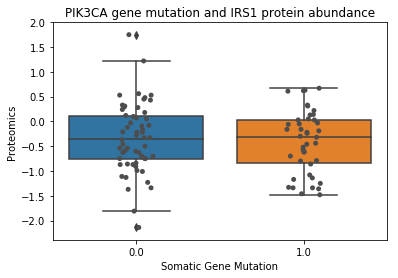

In [5]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

# Phosphorylation

In [6]:
phosProt = phos.filter(regex='IRS1')
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
sigResults = []
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
#print(mutated.head())
wt = cross.loc[cross[gene] == 0.0]
#print(wt.head())

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[gene, loc]].dropna()
        oneSitedf_wt = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        sigResults.append(loc)
        print("Results for " + loc)
        print(ttest)

0.002380952380952381
Results for IRS1-S1005
Ttest_indResult(statistic=-0.9690977556578986, pvalue=0.3365203953002731)
Results for IRS1-S1100
Ttest_indResult(statistic=-2.144151151356816, pvalue=0.035056594434805)
Results for IRS1-S1101
Ttest_indResult(statistic=-2.098899731593709, pvalue=0.038979458432090074)
Results for IRS1-S1134
Ttest_indResult(statistic=-1.770797347381606, pvalue=0.08055195840145042)
Results for IRS1-S270
Ttest_indResult(statistic=-0.7860248714648148, pvalue=0.4337493578683552)
Results for IRS1-S312
Ttest_indResult(statistic=1.3429173455723695, pvalue=0.18561470344519224)
Results for IRS1-S323
Ttest_indResult(statistic=-0.5485686919133093, pvalue=0.5847228047850945)
Results for IRS1-S330
Ttest_indResult(statistic=-1.093938678842869, pvalue=0.27814694985592836)
Results for IRS1-S337
Ttest_indResult(statistic=0.4798182866151812, pvalue=0.6325746861136163)
Results for IRS1-S348
Ttest_indResult(statistic=-0.14935866809247728, pvalue=0.881733079425064)
Results for IRS1-

[Text(0, 0.5, 'Phosphoproteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

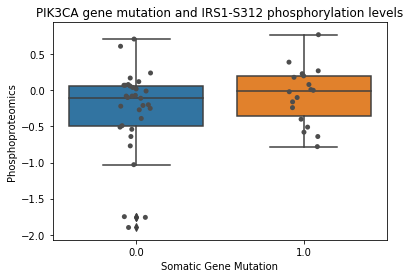

In [8]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[5])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[5] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[5],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

In [9]:
df = CPTAC.get_CNA()


In [11]:
df['PIK3CA']


S001   -0.05
S002    0.00
S003   -0.01
S004   -0.11
S005    0.54
S006   -0.05
S007   -0.01
S008    0.53
S009    0.00
S010    0.01
S011    0.02
S012   -0.03
S013   -0.02
S014    0.76
S015    0.56
S016   -0.04
S017   -0.16
S018   -0.03
S019    0.00
S020   -0.07
S021    0.01
S022   -0.03
S023   -0.02
S024   -0.03
S025   -0.01
S026   -0.01
S027   -0.02
S028   -0.04
S029    0.00
S030    0.20
        ... 
S071   -0.01
S072   -0.03
S073    0.01
S074   -0.05
S075   -0.02
S076    0.00
S077    0.35
S078   -0.01
S079    0.01
S080    0.16
S081   -0.03
S082    0.06
S083   -0.02
S084   -0.10
S085    0.00
S086   -0.03
S087   -0.02
S088    0.15
S089    0.29
S090    0.01
S091    0.00
S092   -0.08
S093    0.65
S094    0.46
S095    0.09
S096   -0.04
S097    0.29
S098    0.10
S099    0.16
S100    0.13
Name: PIK3CA, Length: 100, dtype: float64